In [159]:
### Pr. 1
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from math import cos, pi
import numpy as np
I = [i/1000 for i in range(1, 6, 1)] 
I_2 = [i/1000 for i in range(5, 65, 5)]
t = np.linspace(0, 300, 10000)

def theta(I, t):
    '''
    Assuming the IVP theta(0) = 0, this function takes a list of currents and solves the ODE
    for each given current and then returns a list of voltages and the function theta both mod 2pi
    '''
    for i in I:
        F = lambda t, T: 1 - cos(T) + i*(1 + cos(T))
        sol = solve_ivp(F, [0, 300], [0], t_eval = t)
        V = [cos(pi - i%(2*pi)) for i in list(sol.y[0])]
        theta = sol.y[0]%(2*pi)
    return V, theta


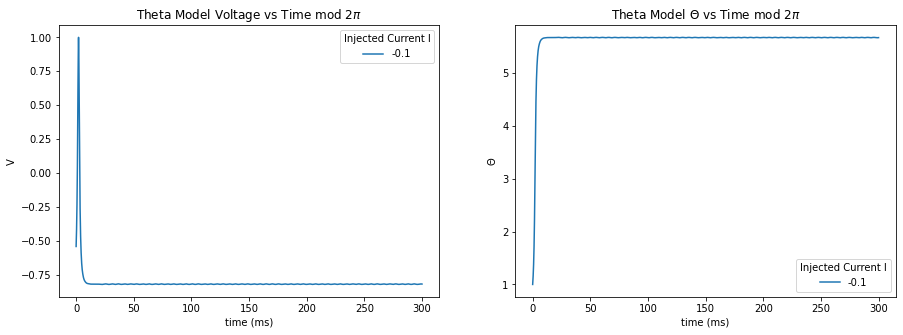

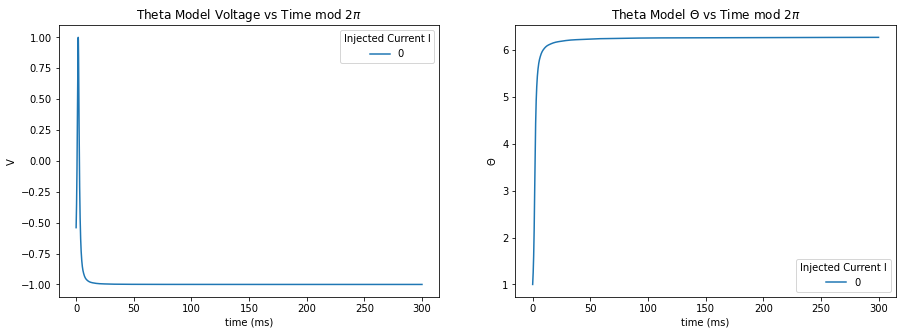

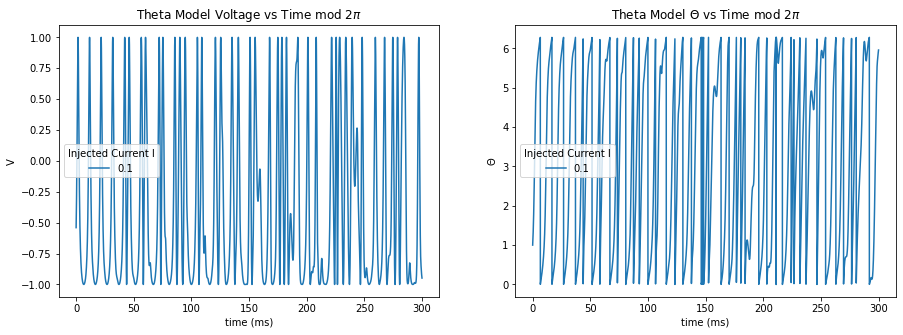

In [178]:
### Pr. 2
def theta_N(I, t):
    '''
    Function theta uses a for loop to solve the ODE for each 
    current and then plots them all on one plot according to their voltage
    Also, theta(0) = 0 for IVP
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    for i in I:
        F = lambda t, T: 1 - cos(T) + i*(1 + cos(T))
        sol = solve_ivp(F, [0, 300], [1], t_eval = t)
        V = [cos(pi - i%(2*pi)) for i in list(sol.y[0])]
        ax1.plot(t, V, label = i)
        ax2.plot(t, sol.y[0]%(2*pi), label = i)
        ax1.set_title('Theta Model Voltage vs Time mod 2$\pi$')
        ax1.set_xlabel('time (ms)')
        ax1.set_ylabel('V')
        ax1.legend(title = 'Injected Current I')
        ax2.set_title('Theta Model $\Theta$ vs Time mod 2$\pi$')
        ax2.set_ylabel('$\Theta$')
        ax2.set_xlabel('time (ms)')
        ax2.legend(title = 'Injected Current I' )
    return None
# theta_N(I, t)
# theta_N([0.001], t)
# theta_N([0.005], t)
# theta_N([0.03], t)
# theta_N([0.06], t)

theta_N([-0.1], t)
theta_N([0], t)
theta_N([0.1], t)
